# Roof top module data processor

## Import the packages

In [2]:
import pyodbc
from sqlalchemy import create_engine
import csv
from data_processor_object import *
import matplotlib.pyplot as plt
import os
import glob

## The input cells

### Define the plotting data

* The "path" varaible a path of the folder where the "access" file for module IV data are stored.
* The "starting_day" is a string representing the first day to start plotting
* The "ending_day" is a string representing the last day to plot.
* The "starting_time" is a string representing the time in the first day to start plotting.
* The "ending_time" is a string representing the time in the last day to plot.

In [3]:
path = r'C:\Users\sijin wang\Desktop\research\RA\Module_data_project\data'

starting_day = '2022_1_2'
ending_day = '2022_12_31'
starting_time = '8:00:00 AM'
ending_time = '9:00:00 PM'

# starting_day = input('Enter a starting date (YYYY-MM-DD) (if month or day only have one digit, put one digit only, eg. 2022_1_2): ')
# ending_day = input('Enter an ending date (YYYY-MM-DD) (if month or day only have one digit, put one digit only, eg. 2022_12_31): ')
# starting_time = input('Enter a starting time (Eg. 8:00:00 AM): ')
# ending_time = input('Enter an ending time (Eg. 9:00:32 PM): ')
# print('The time to start plotting is: ' + str(starting_day) + ' ' + starting_time)
# print('The time to end plotting is: ' + str(ending_day) + ' ' + ending_time)

In [4]:
# paths = []
# open each folder in the given director

# for root, dirs, files in os.walk(path):
#     for filename in glob.glob(os.path.join(root, '*.accdb')):
#         paths.append(filename)
# print(paths)

paths = [
        r'C:\Users\sijin wang\Desktop\research\RA\Module_data_project\data\2022\22-01-25_22-02-28.accdb',
        r'C:\Users\sijin wang\Desktop\research\RA\Module_data_project\data\2022\22-03-01_22-03-31.accdb',
        r'C:\Users\sijin wang\Desktop\research\RA\Module_data_project\data\2022\22-04-01_22-05-02.accdb',
        r'C:\Users\sijin wang\Desktop\research\RA\Module_data_project\data\2022\22-05-02_22-05-31.accdb',
        r'C:\Users\sijin wang\Desktop\research\RA\Module_data_project\data\2022\22-05-31_22-07-01.accdb',
        r'C:\Users\sijin wang\Desktop\research\RA\Module_data_project\data\2022\22-07-01_22-07-31.accdb',
        r'C:\Users\sijin wang\Desktop\research\RA\Module_data_project\data\2022\22-08-01-22_09-01.accdb', # the above are 2022 data.
        r'C:\Users\sijin wang\Desktop\research\RA\Module_data_project\data\2021\SP1053 (2021.8.10-2021.9.15).accdb',
        r'C:\Users\sijin wang\Desktop\research\RA\Module_data_project\data\2021\SP1053 (2021.11.2 - 2022.1.3).accdb',
        r'C:\Users\sijin wang\Desktop\research\RA\Module_data_project\data\2021\SP1053(2021.4.1-2021.5.4).accdb',
        r'C:\Users\sijin wang\Desktop\research\RA\Module_data_project\data\2021\SP1053(2021.5.4-2021.6.16).accdb',
        r'C:\Users\sijin wang\Desktop\research\RA\Module_data_project\data\2021\SP1053(2021.6.16-2021.8.9).accdb', # the above are 2021 data.
        r'C:\Users\sijin wang\Desktop\research\RA\Module_data_project\data\2020\02 June 2020 - 06 July 2020\SP1053.accdb',
        r'C:\Users\sijin wang\Desktop\research\RA\Module_data_project\data\2020\03 Sep 2020 - 07 Oct 2020\SP1053.accdb',
        r'C:\Users\sijin wang\Desktop\research\RA\Module_data_project\data\2020\04 March 2020 - 05 Apr 2020\SP1053.accdb',
        r'C:\Users\sijin wang\Desktop\research\RA\Module_data_project\data\2020\05 May 2020 - 02 June 2020\SP1053.accdb',
        r'C:\Users\sijin wang\Desktop\research\RA\Module_data_project\data\2020\06 Apr 2020 - 05 May 2020\SP1053.accdb',
        r'C:\Users\sijin wang\Desktop\research\RA\Module_data_project\data\2020\06 July 2020 - 20 July 2020\SP1053.accdb',
        r'C:\Users\sijin wang\Desktop\research\RA\Module_data_project\data\2020\06 Nov 2020 - 26 Nov 2020\SP1053.accdb',
        # r'C:\Users\sijin wang\Desktop\research\RA\Module_data_project\data\2020\07 Oct 2020 - 19 Oct 2020\SP1053.accdb',
        r'C:\Users\sijin wang\Desktop\research\RA\Module_data_project\data\2020\17 Aug 2020 - 03 Sep 2020\SP1053.accdb',
        r'C:\Users\sijin wang\Desktop\research\RA\Module_data_project\data\2020\19 Dec 2020 - 28 Jan 2021\SP1053.accdb',
        r'C:\Users\sijin wang\Desktop\research\RA\Module_data_project\data\2020\20 Oct 2020 - 05 Nov 2020\SP1053.accdb',
        r'C:\Users\sijin wang\Desktop\research\RA\Module_data_project\data\2020\27 Nov 2020 - 18 Dec 2020\SP1053.accdb',
        r"C:\Users\sijin wang\Desktop\research\RA\Module_data_project\data\2022\09-01-2022_10-04-2022.accdb",
        r"C:\Users\sijin wang\Desktop\research\RA\Module_data_project\data\2022\10-04-2022_10-26-2022.accdb",
        r"C:\Users\sijin wang\Desktop\research\RA\Module_data_project\data\2022\10-26-2022_12-02-2022.accdb",
        r"C:\Users\sijin wang\Desktop\research\RA\Module_data_project\data\2022\12-02-2022_01-05-2023.accdb",
        ]

### Select the modules

* The "module_number_list" is a list of module we want to investigates, there are 6 modules and the correponding numbers are from 1 to 6.

In [5]:
module_number_list = [6]

### Define the resampling parameters

* "sample_length" is a string representing the period we want to sample, the options are: 'hour', 'day', 'month'.
* "percentile" is a number ranging from 0 to 100, selecting the top xx percent of electrical data.

In [6]:
sample_length = 'second'
percentile = 90

### Define the data selection parameters

* "T_central"is a float representing the centre value of the temperature.
* The selected data should be within the range of T_central $\pm$ dT.
* The unit is C.
* "Ir_central" is a float representing the centre value of the temperature.
* The selected data should be within the range of Ir_central $\pm$ dIr.
* The unit is W/m2.

In [7]:
# for temperatures:
T_central=45
dT = 100

# for irradiance:
Ir_central = 800
dIr = 5

## Define the object & Data collecting

In [8]:
# define the object
data1 = module_data_processor(path = paths, starting_day=starting_day, ending_day=ending_day, starting_time=starting_time, ending_time=ending_time)

# create a list of list for all dates to select paths.
data1.file_date_reader()

# zero removing: this part remove the zero data, but not the empty ones.
data1.zero_remover(removezero=True)

InterfaceError: ('IM002', '[IM002] [Microsoft][ODBC Driver Manager] Data source name not found and no default driver specified (0) (SQLDriverConnect)')

## Module selection & Resampling

This cell select the module and resample the data based on the input.

In [8]:
# select the module to plot: range from 1 to 6
data1.module_selector(module_num_list=module_number_list)

# resample the module: options are 'hour', 'day', 'month', put anything else it will not resample.
data1.multi_module_resampler(sample_length=sample_length, quantile_v=percentile/100)

## Data filtering

This cell filter the data such that the data temperature only include T_central $\pm$ dT and irradiance only include Ir_central $\pm$ dIr.

In [9]:
# Select Temperature and Irradiance range
data1.bin_selector(param_name='MT', centre_value=T_central, rangevalue=dT)
data1.bin_selector(param_name='IR_BEV', centre_value=Ir_central, rangevalue=dIr)

# remove zeros again at the end:
data1.zero_removal2()

## Plotting

### The dagradation plot with time

#### Short circuit current

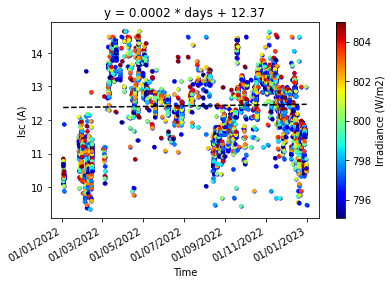

In [10]:
data1.data_ploter_with_time_multimodule(target_name='Isc', linear_fit=True, color_code=True, color_name='IR_BEV', interpol=False)

#### Open circuit voltage

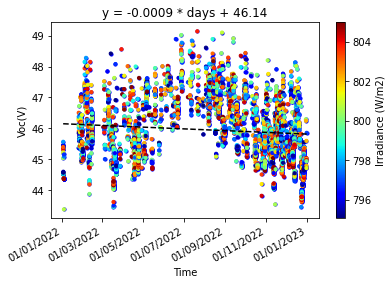

In [11]:
data1.data_ploter_with_time_multimodule(target_name='Voc', linear_fit=True, color_code=True, color_name='IR_BEV', interpol=False)

#### Maximum power point

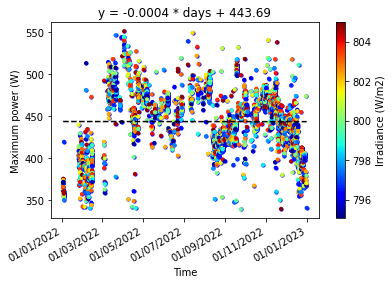

In [12]:
data1.data_ploter_with_time_multimodule(target_name='Pm', linear_fit=True, color_code=True, color_name='IR_BEV', interpol=False)

#### Fill factor

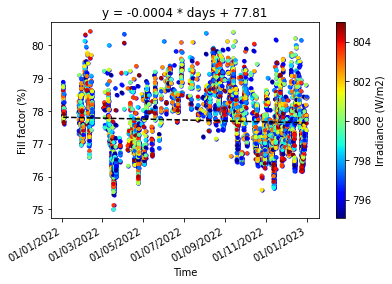

In [13]:
data1.data_ploter_with_time_multimodule(target_name='FF', linear_fit=True, color_code=True, color_name='IR_BEV', interpol=False)

#### Efficiency (the module area must be given)

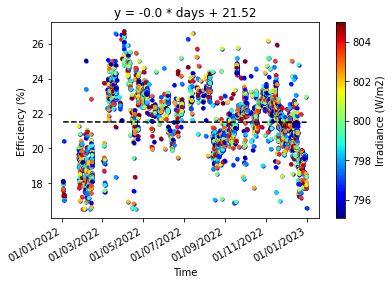

In [14]:
data1.data_ploter_with_time_multimodule(target_name='eff', linear_fit=True, color_code=True, color_name='IR_BEV', interpol=False) # the efficinecy is no known because we don't know hte module area

### Plotting against each other

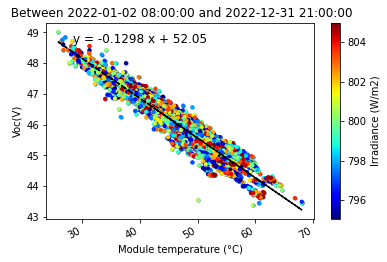

In [15]:
data1.data_parameter_plot_multimodule(x_name='MT', y_name='Voc', linear_fit=True, color_code=True)